# Import Dependencies

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a barplot

In [19]:
# import the data
df = pd.read_csv(r"C:\Users\noahb\OneDrive\Documents\Dow GIDAS 21-22\Upsampling RNAseq\DESeq2NormalizedData.csv", index_col=0)
df.head()

,1,100,1000,10000,100009676,10001,10003,100037417,10004,100049716,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
GSM3577568,8.103918,7.937909,10.257489,11.186453,5.995394,7.667819,9.199965,10.280796,6.549983,6.243322,...,11.221806,10.175303,10.056090,5.454826,9.981236,8.396273,5.518956,11.268024,6.487247,9.417459
GSM3577569,7.009610,7.902695,10.120491,10.939458,6.258109,7.682248,7.454174,8.647815,6.885065,6.598184,...,12.246937,11.343959,10.626753,7.470028,10.016374,8.426003,3.276256,11.831612,8.417852,8.438144
GSM3577570,7.046131,7.680613,10.303429,11.387845,6.331885,7.715589,8.728490,8.635666,6.113245,6.541339,...,12.492072,11.431233,10.663922,8.280252,10.833722,8.928075,2.653813,11.588094,9.232752,8.337510
GSM3577571,7.486468,7.611999,10.277881,11.121012,5.280793,7.842296,8.047696,9.168947,6.455880,6.257334,...,11.654149,10.630377,10.269111,5.818450,9.913436,8.332221,4.326597,11.708139,7.896452,9.286598
GSM3577572,7.553102,8.112529,10.274801,11.085076,6.112529,7.578193,7.974453,8.771874,6.264532,7.089446,...,11.903434,10.865720,10.183736,5.993230,10.011766,8.448132,4.383177,11.705105,8.359251,9.140874


In [20]:
df.shape

(289, 16232)

In [21]:
data = df.transpose()
data.shape

(16232, 289)

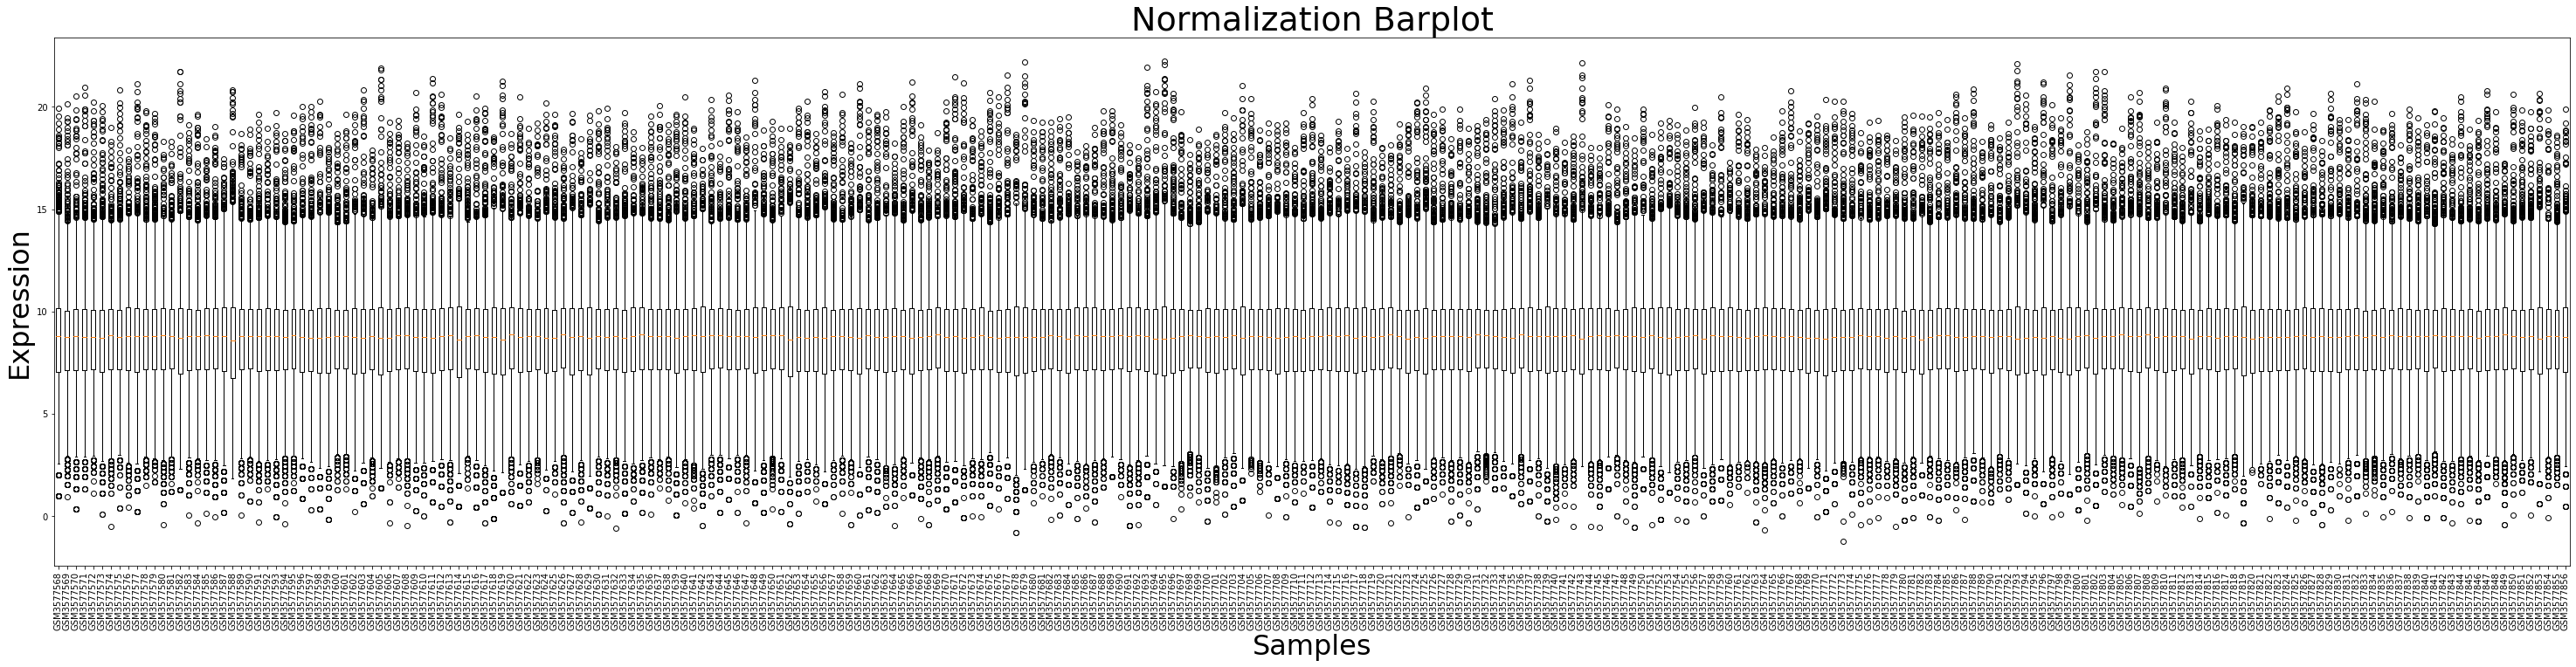

In [22]:
plt.style.use('fast')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.set_size_inches(50, 10.5)

plt.boxplot(data)
plt.xticks(rotation = 90)

plt.xlabel("Samples", size=32)
plt.ylabel("Expression", size=32)
plt.title("Normalization Barplot", size=38)

x_ticks = list(df.index)
ax.set_xticklabels(x_ticks)

plt.show()

# Replace DF ids with Gene Symbols

In [23]:
# import conversion library
translate = pd.read_csv(r"C:\Users\noahb\OneDrive\Documents\Dow GIDAS 21-22\Upsampling RNAseq\Translatekey.csv")
translate.head() # same order as the df

,1,100,1000,10000,100009676,10001,10003,100037417,10004,100049716,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
0,A1BG,ADA,CDH2,AKT3,ZBTB11-AS1,MED6,NAALAD2,DDTL,NAALADL1,NINJ2-AS1,...,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2


In [24]:
colNames = list(translate.iloc[0, :])
colNames[1:5]

['ADA', 'CDH2', 'AKT3', 'ZBTB11-AS1']

In [25]:
DataTot = df.set_axis(colNames, axis=1, inplace=False)
DataTot.head()

,A1BG,ADA,CDH2,AKT3,ZBTB11-AS1,MED6,NAALAD2,DDTL,NAALADL1,NINJ2-AS1,...,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2
GSM3577568,8.103918,7.937909,10.257489,11.186453,5.995394,7.667819,9.199965,10.280796,6.549983,6.243322,...,11.221806,10.175303,10.056090,5.454826,9.981236,8.396273,5.518956,11.268024,6.487247,9.417459
GSM3577569,7.009610,7.902695,10.120491,10.939458,6.258109,7.682248,7.454174,8.647815,6.885065,6.598184,...,12.246937,11.343959,10.626753,7.470028,10.016374,8.426003,3.276256,11.831612,8.417852,8.438144
GSM3577570,7.046131,7.680613,10.303429,11.387845,6.331885,7.715589,8.728490,8.635666,6.113245,6.541339,...,12.492072,11.431233,10.663922,8.280252,10.833722,8.928075,2.653813,11.588094,9.232752,8.337510
GSM3577571,7.486468,7.611999,10.277881,11.121012,5.280793,7.842296,8.047696,9.168947,6.455880,6.257334,...,11.654149,10.630377,10.269111,5.818450,9.913436,8.332221,4.326597,11.708139,7.896452,9.286598
GSM3577572,7.553102,8.112529,10.274801,11.085076,6.112529,7.578193,7.974453,8.771874,6.264532,7.089446,...,11.903434,10.865720,10.183736,5.993230,10.011766,8.448132,4.383177,11.705105,8.359251,9.140874


# Find GO Biological Process to Focus On

Goal: empower researchers to research an aspect of Alzheimer's with great efficiency and very cheaply

Potential Name: Proof of Concept Novel Technique for the Mass study of Alzheimer's and Cardiovascular *hypoperfusion* Link
Attempt 1: Cardiovascular issues

Source 1: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7222603/ - study finds common links between Cardiovascular disease and Alzheimer's
Abstract:
Methods:
- review based on data from 40 years of clinical trial databases
- 98 papers used to evaluate research

Results:
- AD and CVD are bad for health, but studying their combination is difficult
- More research is needed to clarify the impact of vascular factors on these diseases
- It may be hypothesized that there are various mechanisms underlying the association, ex. hypoperfusion and emboli, atherosclerosis, and amyloid deposits

Conclusions:
- AD and CVD link needs further investigation
- More research and conclusions need to be reached on the hypothesized mechanisms of this association
- more research on gender issues needs to be done


Source 2: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7815481/ - lists pathways in numerous areas relating to pathogenesis of Alzheimer's
Section 8 - Vascular Mechanics:
- vascular disfunction in the BBB is common in AD patients
- events set in motion by vascular disfunction creat Abeta plaques
- chronic hypoperfusion also promotes formation of Abeta plaques
- Still have not determined whether vascular dysfunctions cause the AD

Note:
* Interesting that hypoperfusion is mentioned in both studies, look into GO pathways

Review note:
- unfortunately, it does not seem that there is an aggregated list of genes associated with hypoperfusion. Instead, we may want to look at another GEO study (just using microarrays) and extract the top 100-300 most differentially regulated genes by logFC from there to use as our dataset (of course cross referenced with the genes we do have)

# Select genes to focus on

genes extracted from DE here: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE132651

In [2]:
import pandas as pd

In [30]:
df = pd.read_excel(r"C:\Users\noahb\Downloads\bruteforcegenes.xlsx")
df.head()

,MMP1
0,TFPI2
1,ANGPT2
2,SULF1
3,SULF1
4,FABP4


In [40]:
genes = (df.iloc[0:200, :].values)
gene_list = []
for gene in genes:
    gene_list.append(str(gene)[2:-2])

gene_list

['TFPI2',
 'ANGPT2',
 'SULF1',
 'SULF1',
 'FABP4',
 'ANGPT2',
 'IL1RL1',
 'TFPI2',
 'ADGRF5',
 'FST',
 'VAMP8',
 'SULF1',
 'MRC1',
 'TOX',
 'BASP1',
 'EMCN',
 'LYVE1',
 'COL4A5',
 'MMP10',
 'ANKRD1',
 'TACSTD2',
 'GULP1',
 'RASGRP3',
 'LEPROT///LEPR',
 'GULP1',
 'NUPR1',
 'PBK',
 'SULT1E1',
 'ADGRF5',
 'PROS1',
 'EPB41L3',
 'ALDH1A1',
 'PFN2',
 'FABP5',
 'TSPAN13',
 'FGF13',
 'LIMCH1',
 'GMFG',
 'IL1R1',
 'PDE2A',
 'SRSF6',
 'TGFB2',
 'LYN',
 'CLU',
 'LBH',
 'MIR6787///SLC16A3',
 'EPB41L3',
 'CHST15',
 'ANOS1',
 'TIMP3',
 'RRM2',
 'RGCC',
 'MIR6787///SLC16A3',
 'EPB41L3',
 'FST',
 'HSD17B2',
 'GULP1',
 'THSD7A',
 'SLC6A15',
 'LTBP1',
 'COL13A1',
 'LIMCH1',
 'KRT7',
 'ANXA3',
 'MAD2L1',
 'LAMP3',
 'DYSF',
 'SLC35F6///CENPA',
 'CLEC2B',
 'LDB2',
 'LTBP1',
 'LYVE1',
 'DKK1',
 'RPS4Y1',
 'SLIT2',
 'DPYSL3',
 'FBLN5',
 'NRP2',
 'CXCR4',
 'C10orf10',
 'CLU',
 'NRG1',
 'CSGALNACT1',
 'HJURP',
 'ASPM',
 'PLA2G4C',
 'ADIRF',
 'TOP2A',
 'BST2',
 'CD44',
 'HLA-B',
 'LIMCH1',
 'TGFB2',
 'DLGAP5',


In [55]:
# see which ones match
colNames = list(DataTot.columns)

gene_overlap = list(set(gene_list).intersection(colNames))
len(gene_overlap)

120

In [56]:
selectDf = DataTot.loc[:, gene_overlap[0:100]]
selectDf.head()

,PCDH7,RELN,CCNB1,LTBP1,CCND2,TRPV2,SH3BP5,LIMCH1,TMPO,EMCN,...,KIF20A,LBH,PFN2,LYVE1,GPX3,GYPC,PIEZO2,UCHL1,VAMP8,BCHE
GSM3577568,9.134945,7.750282,6.802749,7.853375,10.489249,7.017762,9.280796,11.232604,8.878037,7.299175,...,5.082857,8.124677,11.815573,10.810777,10.707921,9.233799,8.103918,14.202713,8.809175,7.082857
GSM3577569,7.914330,8.590953,5.508917,9.544915,10.859715,7.576380,10.012320,12.027465,9.316272,8.957143,...,4.124253,10.097711,10.849146,8.004177,9.470028,9.119235,9.283003,11.463608,7.914330,7.885065
GSM3577570,8.946595,10.609173,5.791317,8.274400,10.301991,6.855447,10.052984,12.713428,9.805591,8.100069,...,4.139240,7.931798,11.444325,8.843638,9.343112,9.018386,11.329770,12.014002,7.847585,9.238776
GSM3577571,8.911559,8.675325,6.435121,8.153145,11.137971,7.970453,9.946816,11.203881,8.777808,7.536050,...,4.850158,7.752861,11.734395,9.752861,10.512711,8.802330,8.701636,13.600538,9.074789,7.435121
GSM3577572,8.929665,9.272241,6.364068,8.479545,10.460555,7.929665,9.931289,12.192226,9.074829,8.023993,...,4.594681,7.561514,11.432166,8.610983,10.265820,8.429870,9.555210,13.002528,7.955428,8.129603


# Make dataset

In [64]:
# create 70/30 split
shuffledData = selectDf.sample(frac=1, random_state=42)
shuffledData.head()

,PCDH7,RELN,CCNB1,LTBP1,CCND2,TRPV2,SH3BP5,LIMCH1,TMPO,EMCN,...,KIF20A,LBH,PFN2,LYVE1,GPX3,GYPC,PIEZO2,UCHL1,VAMP8,BCHE
GSM3577613,10.912153,8.716424,7.211097,8.344953,11.051840,7.398724,10.766368,12.101598,9.583430,6.649982,...,4.304207,6.986031,13.355416,7.730471,9.174571,7.304207,9.309831,14.104904,6.967172,7.874062
GSM3577725,7.851302,6.224214,6.404786,9.493912,10.718203,7.577851,9.098683,10.780848,8.793057,8.354412,...,4.732361,8.776755,11.193840,9.526777,11.150213,9.302216,6.754728,12.935403,8.397697,6.754728
GSM3577842,9.005327,10.901335,6.709394,8.505666,10.407851,7.353251,9.942329,12.138054,9.730176,8.015782,...,4.487002,7.873583,12.018384,8.954608,10.374730,8.802906,9.904855,13.478760,7.867824,8.091864
GSM3577610,10.368761,7.801313,7.353260,7.938222,11.076131,8.418551,10.155517,10.746425,8.635462,6.967606,...,5.183335,7.472842,13.170757,7.142693,9.642767,8.685835,7.111442,14.912909,8.280197,6.439675
GSM3577749,11.081365,9.300407,7.383220,8.461536,11.460477,8.011251,11.025167,11.723511,9.195675,6.614103,...,3.856674,8.506015,13.413636,6.865236,9.392134,6.813084,8.018945,14.078318,5.987918,6.486724


In [63]:
x, y = shuffledData.shape
splitThreshold = round(x*.7)

TrainData = shuffledData.iloc[0:splitThreshold, :]
TestData = shuffledData.iloc[splitThreshold:, :]

In [78]:
# create input and output set (50/50)
# randomize columns
tempShuffleDf = TrainData.T
tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=500)
TrainData = tempShuffleDf.T
tempShuffleDf = TestData.T
tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=500)
TestData = tempShuffleDf.T

# split the data
trainx = TrainData.iloc[0:50, :]
trainy = TrainData.iloc[50:, :]

testx = TestData.iloc[0:50, :]
testy = TestData.iloc[50:, :]

In [81]:
testy.head()

,GSM3577758,GSM3577785,GSM3577597,GSM3577628,GSM3577637,GSM3577598,GSM3577615,GSM3577802,GSM3577576,GSM3577607,...,GSM3577686,GSM3577827,GSM3577826,GSM3577577,GSM3577850,GSM3577609,GSM3577825,GSM3577698,GSM3577678,GSM3577801
MT1X,10.110721,10.413819,9.432732,10.105861,9.992669,10.321427,10.358107,10.756056,10.172340,10.832616,...,10.196299,10.040457,10.034215,12.031367,10.953277,11.025339,10.363836,8.870787,9.849533,9.651329
EMP3,7.243477,8.952088,9.007278,8.045350,8.636183,9.926568,9.013279,9.156594,7.678267,9.367387,...,8.056519,9.323800,7.562710,9.358079,8.321462,8.993984,8.286044,8.560780,7.070105,8.280173
BCHE,7.093234,8.225397,6.580578,7.093960,7.839717,6.472850,7.623664,5.527237,6.989682,7.441000,...,7.116128,8.026227,8.271519,7.258913,8.020459,8.514712,7.834583,7.505538,6.368103,7.658991
PLPP3,11.876512,11.848630,11.682843,12.059327,12.132332,10.354429,13.162213,9.893560,12.416482,12.060808,...,12.174610,11.537858,12.451300,13.142308,12.025859,12.180942,12.113244,12.209068,9.748763,12.824324
RELN,8.930439,10.446127,8.626674,8.790383,10.203341,8.739365,8.410169,9.077984,9.764889,9.260919,...,9.043934,8.795869,8.913445,8.431302,9.972047,8.395249,8.587851,9.391177,9.016018,9.111738


# Train Random Forest

# Test random forest

# Grid Search Optimization

# Analyze Results